In [3]:
from fly_analysis import braidz
from fly_analysis import filtering
from fly_analysis.processing import extract_stimulus_centered_data
import numpy as np
from matplotlib import pyplot as plt
from fly_analysis.plotting import plot_mean_and_std
from fly_analysis.plotting import plot_trajectory
from datetime import datetime
from scipy import stats
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
from scipy.stats import kruskal
from scipy.stats import friedmanchisquare
import pandas as pd

In [4]:
df, csvs = braidz.read_braidz(r"C:\\Users\\pandey\\Desktop\\Braidz Files\\20240915_140001.braidz")

Reading C:\\Users\\pandey\\Desktop\\Braidz Files\\20240915_140001.braidz using pyarrow


In [5]:
df,csvs["opto"]

(          obj_id    frame     timestamp         x         y         z  \
 0              0    65115  1.726402e+09  0.100821  0.071677  0.324097   
 1              0    65116  1.726402e+09  0.100912  0.071601  0.324142   
 2              0    65117  1.726402e+09  0.100983  0.071483  0.324132   
 3              0    65118  1.726402e+09  0.101031  0.071364  0.324093   
 4              0    65119  1.726402e+09  0.101081  0.071202  0.324038   
 ...          ...      ...           ...       ...       ...       ...   
 14134356  237011  7651033  1.726478e+09  0.179935 -0.044492  0.323539   
 14134357  237011  7651034  1.726478e+09  0.180710 -0.045029  0.324159   
 14134358  237011  7651035  1.726478e+09  0.181886 -0.045709  0.325110   
 14134359  237011  7651036  1.726478e+09  0.182764 -0.046375  0.325477   
 14134360  237011  7651037  1.726478e+09  0.183547 -0.046968  0.325698   
 
               xvel      yvel      zvel           P00           P01  \
 0         0.003386 -0.005602 -0.001803

In [6]:
data = extract_stimulus_centered_data(df, csvs["opto"])

In [7]:
median_obj_id = filtering.filter_by_median_position(df, xlim=[-0.2, 0.2], ylim=[-0.2, 0.2], zlim=[0.1, 0.3])
duration_obj_id = filtering.filter_by_duration(df, threshold=5)

shared_elements = set(median_obj_id) & set(duration_obj_id)
shared_elements

{127,
 171,
 416,
 420,
 1717,
 1722,
 1813,
 1820,
 1945,
 2886,
 4171,
 5022,
 10631,
 15846,
 18848,
 25389,
 25486,
 31088,
 48471,
 76169,
 79758,
 85549,
 92568,
 100650,
 118710,
 120299,
 121406,
 134555,
 135625,
 138170,
 157832,
 158276,
 165526,
 165777,
 168214,
 182494,
 189530,
 196471,
 199255,
 200620,
 201478,
 203722,
 204975,
 207353,
 219849,
 220808,
 229584,
 235805}

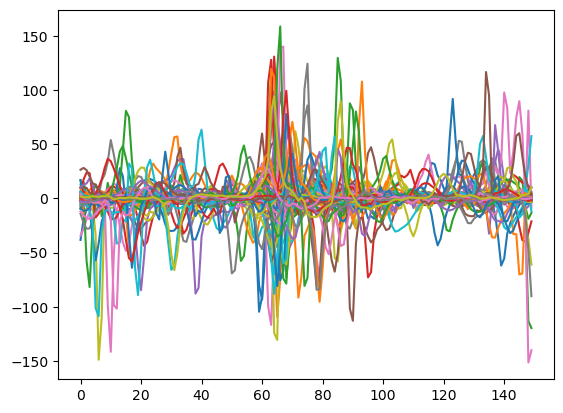

In [8]:
fig = plt.figure()
for d in data["angular_velocity"]:
    plt.plot(d)
plt.show()

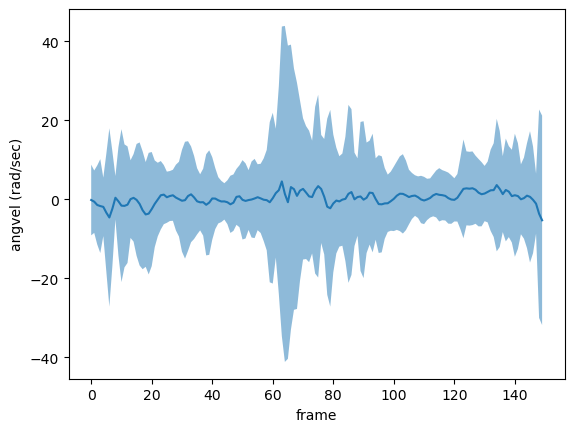

In [9]:
fig, ax = plt.subplots()
plot_mean_and_std(np.array(data["angular_velocity"]), ax=ax)
ax.set_xlabel("frame")
ax.set_ylabel("angvel (rad/sec)")
plt.show()

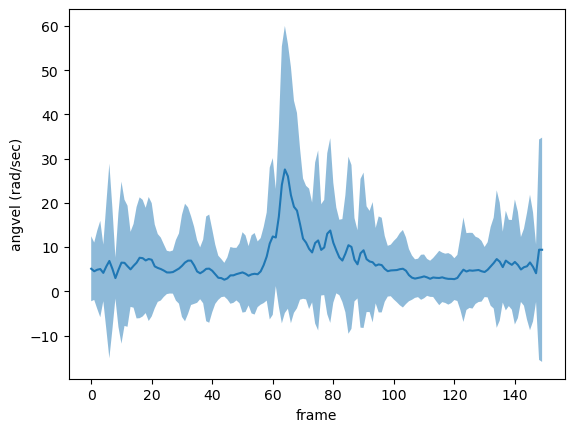

In [10]:
fig, ax = plt.subplots()
plot_mean_and_std(np.abs(np.array(data["angular_velocity"])), ax=ax)
ax.set_xlabel("frame")
ax.set_ylabel("angvel (rad/sec)")
plt.show()

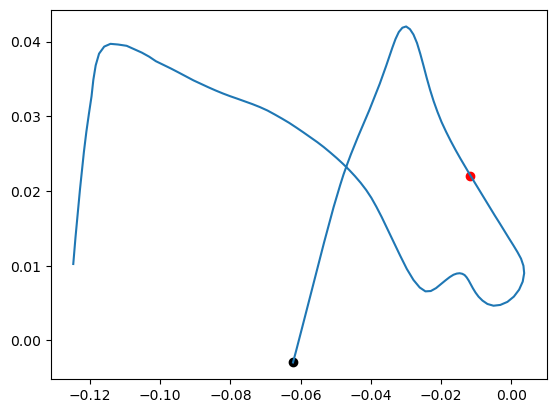

In [12]:
i = 7
traj = data["position"][i]

fig = plt.figure()
plt.plot(traj[:,0], traj[:,1])
plt.scatter(traj[50,0], traj[50,1], color="red")
plt.scatter(traj[0,0], traj[0,1], color="black")
plt.show()

In [13]:
data1_max = np.max(np.abs(np.asarray(data["angular_velocity"])[:, 50:80]), axis=1)

In [14]:
mean_data = np.mean(data1_max)
print(mean_data)
std_dev = np.std(data1_max, ddof=1)  
std_error = std_dev / np.sqrt(len(data1_max))
print(f"Standard Deviation of data1_max: {std_dev:.4f}")
print(f"Standard Error of data1_max: {std_error:.4f}")

62.555189360259725
Standard Deviation of data1_max: 39.6535
Standard Error of data1_max: 4.7737


In [15]:
print(f"Shape of data1_max: {data1_max.shape}")
flattened_data = data1_max.ravel()
print(f"Shape of flattened data: {flattened_data.shape}")
k2, p_value = stats.normaltest(flattened_data)
print(f"D'Agostino's K-squared Test Statistic: {k2}")
print(f"P-value: {p_value}")

Shape of data1_max: (69,)
Shape of flattened data: (69,)
D'Agostino's K-squared Test Statistic: 5.486708760889044
P-value: 0.06435411624692951
